In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import files
uploaded = files.upload()

Saving vocabulary.py to vocabulary.py
Saving train_loop.py to train_loop.py
Saving seq2seq_model.py to seq2seq_model.py
Saving parsers.py to parsers.py
Saving data_norm.py to data_norm.py
Saving data_loader.py to data_loader.py
Saving data_analyze.py to data_analyze.py


In [4]:
from parsers import load_one_file_texts


limit_dataset = load_one_file_texts("drive/MyDrive/ColabNotebooks/limit_data.txt")



RU: садиться , пожалуйста .
EN: please take a seat .

RU: используй свой кулак .
EN: use your fist .

RU: это взбесить тома ?
EN: do that make Tom mad ?

RU: приводите с себя брат .
EN: bring your brother with you .

RU: нет худа без добро .
EN: every cloud have a silver lining .

RU: это должный быть сделать к понедельник .
EN: this must be do by Monday .

Length: 540675
Russian Mean: 6.84, SD: 3.33
English Mean: 7.73, SD: 3.47
Unique Russian words: 42403
Unique English words: 23532


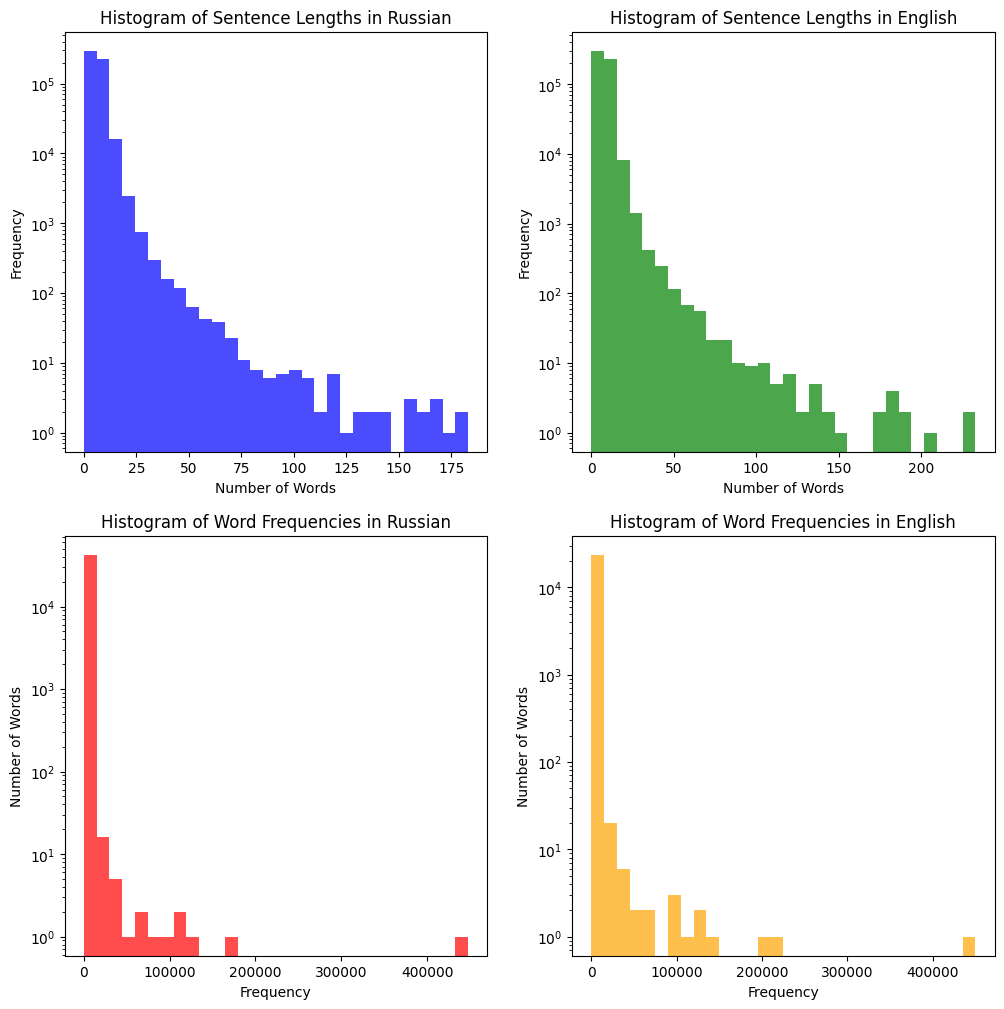

In [7]:
from data_analyze import show_random, stat

show_random(limit_dataset, 6)
stat(limit_dataset, log=True)

In [5]:
norm_dataset = load_one_file_texts("drive/MyDrive/ColabNotebooks/norm_data.txt")


RU: не бойтесь делать ошибки .
EN: do n't be afraid of making mistakes .

RU: скажи мне , что ты об этом думаешь .
EN: tell me what your opinion is .

RU: ты когда - нибудь бывал в тегеране ?
EN: have you ever been to tehran ?

RU: я бы предпочёл не выходить сегодня .
EN: i would rather not go out today .

RU: том достал пирог из духовки .
EN: tom took the pie out of the oven .

RU: мне пришлось им соврать .
EN: i had to lie to them .

Length: 540675
Russian Mean: 6.84, SD: 3.33
English Mean: 7.73, SD: 3.47
Unique Russian words: 83451
Unique English words: 28261


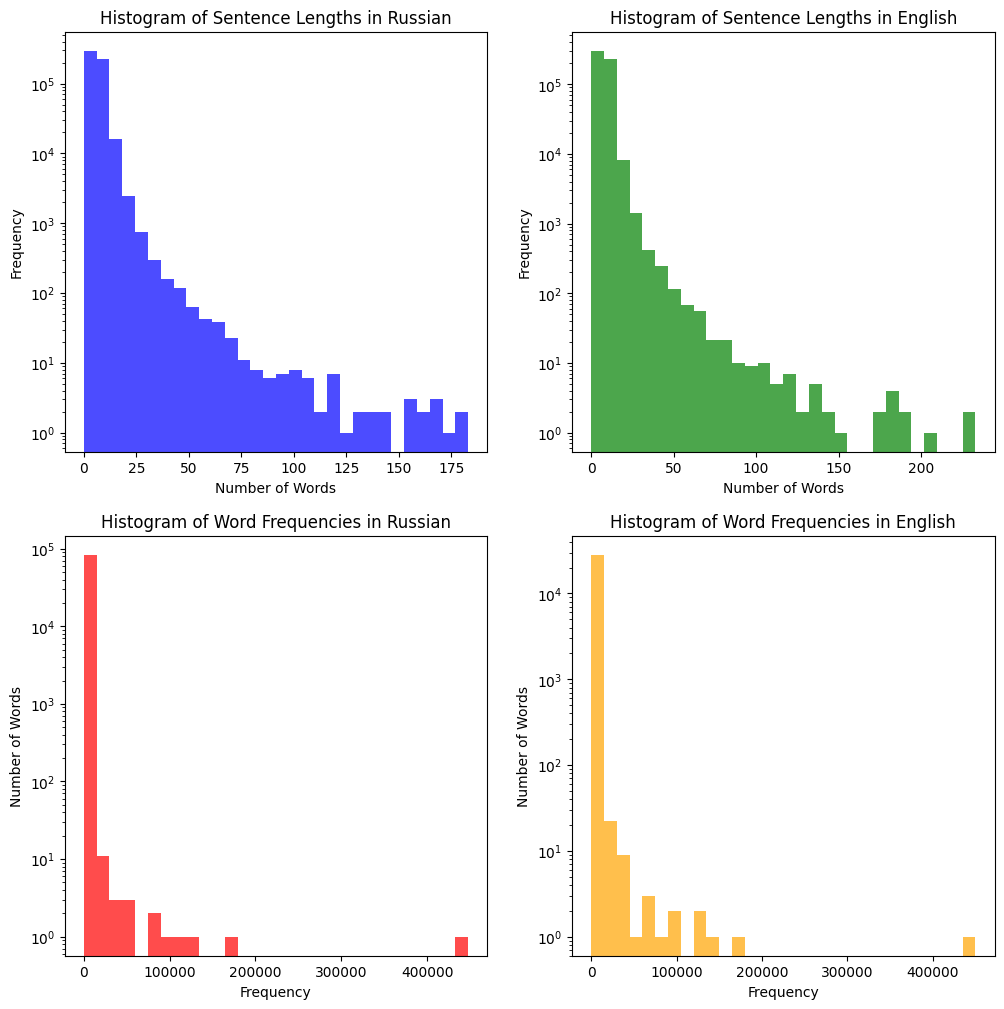

In [8]:
show_random(norm_dataset, 6)
stat(norm_dataset, log=True)

In [9]:
from data_analyze import compare_datasets

compare_datasets((norm_dataset, limit_dataset), 5)

dataset 0: ('джон оставил дверь открытой .', 'john kept the door open .')
dataset 1: ('джон оставить дверь открытый .', 'John keep the door open .')

dataset 0: ('зачем они тебе нужны ?', 'why do you need them ?')
dataset 1: ('зачем они тебе нужный ?', 'why do you need they ?')

dataset 0: ('я не хотел , чтобы том помогал мне с уроками .', "i did n't want tom to help me with my homework .")
dataset 1: ('я не хотеть , чтобы том помогать мне с урок .', 'I do not want Tom to help I with my homework .')

dataset 0: ('я говорил вам не рассказывать тому .', 'i told you not to tell tom .')
dataset 1: ('я говорить вам не рассказывать тому .', 'I tell you not to tell Tom .')

dataset 0: ('вам надо было мне заранее сказать .', 'you should have told me in advance .')
dataset 1: ('вам надо было мне заранее сказать .', 'you should have tell I in advance .')



In [10]:
from vocabulary import Vocabulary

limit_ru_sentences, limit_en_sentences = zip(*limit_dataset)

LIMIT_RU_VOCAB_SIZE=34800
LIMIT_EN_VOCAB_SIZE=18500

limit_ru_vocab = Vocabulary(limit_ru_sentences, LIMIT_RU_VOCAB_SIZE)
limit_en_vocab = Vocabulary(limit_en_sentences, LIMIT_EN_VOCAB_SIZE)

In [11]:
NORM_RU_VOCAB_SIZE=83400
NORM_EN_VOCAB_SIZE=28200

norm_ru_sentences, norm_en_sentences = zip(*norm_dataset)

norm_ru_vocab = Vocabulary(norm_ru_sentences, NORM_RU_VOCAB_SIZE)
norm_en_vocab = Vocabulary(norm_en_sentences, NORM_EN_VOCAB_SIZE)

In [17]:
from data_loader import create_loaders

train_loader, valid_loader = create_loaders(0.75, 64, norm_ru_vocab, norm_en_vocab, norm_dataset)

In [18]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"GPU is available: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("GPU is not available, using CPU instead.")

GPU is available: Tesla T4


In [19]:
from seq2seq_model import Seq2SeqLSTM, init_weights
import torch
from train_loop import train_model

In [25]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
full_model = Seq2SeqLSTM(
    input_size=NORM_RU_VOCAB_SIZE,
    output_size=NORM_EN_VOCAB_SIZE,
    embedding_decoder_dim=128,
    embedding_encoder_dim=128,
    hidden_decoder_dim=256,
    hidden_encoder_dim=256,
    num_decoder_layers=4,
    num_encoder_layers=4,
    dropout_rate=0.5
).to(device)

full_model.apply(init_weights)

train_model(
    model=full_model,
    train_loader=train_loader,
    valid_loader=valid_loader,
    num_epochs=15,
    learning_rate=0.002,
    weight_decay=1e-5,
    teacher_forcing_ratio=0.4,
    name='v1_6_full_1',
    target_vocab=norm_en_vocab
)

  0% (0 of 6337) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Epoch 1:
              Train Loss: 4.7684,
              Validation Loss: 4.2091,
              BLUE score: 0.1041


  0% (0 of 6337) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Epoch 2:
              Train Loss: 3.7048,
              Validation Loss: 3.6645,
              BLUE score: 0.2260


  0% (0 of 6337) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Epoch 3:
              Train Loss: 3.3689,
              Validation Loss: 3.4419,
              BLUE score: 0.2852


  0% (0 of 6337) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Epoch 4:
              Train Loss: 3.2117,
              Validation Loss: 3.3547,
              BLUE score: 0.3160


  0% (0 of 6337) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Epoch 5:
              Train Loss: 3.1258,
              Validation Loss: 3.2580,
              BLUE score: 0.3350


  0% (0 of 6337) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Epoch 6:
              Train Loss: 3.0736,
              Validation Loss: 3.1989,
              BLUE score: 0.3467


  0% (0 of 6337) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Epoch 7:
              Train Loss: 3.0307,
              Validation Loss: 3.2090,
              BLUE score: 0.3589


  0% (0 of 6337) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Epoch 8:
              Train Loss: 3.0013,
              Validation Loss: 3.2066,
              BLUE score: 0.3599


  0% (0 of 6337) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Epoch 9:
              Train Loss: 2.9785,
              Validation Loss: 3.1639,
              BLUE score: 0.3670


  0% (0 of 6337) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Epoch 10:
              Train Loss: 2.9562,
              Validation Loss: 3.1258,
              BLUE score: 0.3747


  0% (0 of 6337) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Epoch 11:
              Train Loss: 2.9403,
              Validation Loss: 3.1214,
              BLUE score: 0.3731


  0% (0 of 6337) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Epoch 12:
              Train Loss: 2.9269,
              Validation Loss: 3.1170,
              BLUE score: 0.3620


  0% (0 of 6337) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Epoch 13:
              Train Loss: 2.9129,
              Validation Loss: 3.0935,
              BLUE score: 0.3208


  0% (0 of 6337) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Epoch 14:
              Train Loss: 2.9043,
              Validation Loss: 3.0860,
              BLUE score: 0.3846


 99% (6335 of 6337) |################### | Elapsed Time: 0:28:23 ETA:   0:00:00

Epoch 15:
              Train Loss: 2.8958,
              Validation Loss: 3.0732,
              BLUE score: 0.3881
Training complete.


In [ ]:
del(full_model)
gc.collect()
torch.cuda.empty_cache()

In [ ]:
limit_model = Seq2SeqLSTM(
    input_size=LIMIT_RU_VOCAB_SIZE,
    output_size=LIMIT_EN_VOCAB_SIZE,
    embedding_decoder_dim=128,
    embedding_encoder_dim=128,
    hidden_decoder_dim=256,
    hidden_encoder_dim=256,
    num_decoder_layers=4,
    num_encoder_layers=4,
    dropout_rate=0.5
)

limit_model.load_state_dict(torch.load('drive/MyDrive/ColabNotebooks/model_v1_6_epoch_10'))

full_model = Seq2SeqLSTM(
    input_size=NORM_RU_VOCAB_SIZE,
    output_size=NORM_EN_VOCAB_SIZE,
    embedding_decoder_dim=128,
    embedding_encoder_dim=128,
    hidden_decoder_dim=256,
    hidden_encoder_dim=256,
    num_decoder_layers=4,
    num_encoder_layers=4,
    dropout_rate=0.5
)

full_model.apply(init_weights)

full_model.encoder_lstm = limit_model.encoder_lstm
full_model.decoder_lstm = limit_model.decoder_lstm

# Example for transferring encoder embeddings from limited to normal model
for norm_token, norm_idx in norm_ru_vocab.token_to_index.items():
    if norm_token in limit_ru_vocab.token_to_index:
        limit_idx = limit_ru_vocab.token_to_index[norm_token]
        full_model.encoder_embedding.weight.data[norm_idx] = limit_model.encoder_embedding.weight.data[limit_idx]

# Similar process for the decoder embeddings
for norm_token, norm_idx in norm_en_vocab.token_to_index.items():
    if norm_token in limit_en_vocab.token_to_index:
        limit_idx = limit_en_vocab.token_to_index[norm_token]
        full_model.decoder_embedding.weight.data[norm_idx] = limit_model.decoder_embedding.weight.data[limit_idx]

full_model = full_model.to(device)

del(limit_model)

train_model(
    model=full_model,
    train_loader=train_loader,
    valid_loader=valid_loader,
    num_epochs=15,
    learning_rate=0.002,
    weight_decay=1e-5,
    teacher_forcing_ratio=0.4,
    name='v1_6_easy_transfer_1',
    target_vocab=norm_en_vocab
)

In [ ]:
del(full_model)
gc.collect()
torch.cuda.empty_cache()

In [16]:
similar_ru_tokens = {}
similar_en_tokens = {}


def get_similarity(norm_data, limit_data, similar_dict):
    for norm_word, limit_word in zip(norm_data.split(' '), limit_data.split(' ')):
        if similar_dict.get(norm_word, None) is None:
            similar_dict[norm_word] = {limit_word: 1}
        else:
            if similar_dict[norm_word].get(limit_word, None) is None:
                similar_dict[norm_word][limit_word] = 1
            else:
                similar_dict[norm_word][limit_word] += 1


for norm_data, limit_data in zip(norm_dataset, limit_dataset):
    get_similarity(norm_data[0], limit_data[0], similar_ru_tokens)
    get_similarity(norm_data[1], limit_data[1], similar_en_tokens)


In [17]:
limit_model = Seq2SeqLSTM(
    input_size=LIMIT_RU_VOCAB_SIZE,
    output_size=LIMIT_EN_VOCAB_SIZE,
    embedding_decoder_dim=128,
    embedding_encoder_dim=128,
    hidden_decoder_dim=256,
    hidden_encoder_dim=256,
    num_decoder_layers=4,
    num_encoder_layers=4,
    dropout_rate=0.5
)

limit_model.load_state_dict(torch.load('drive/MyDrive/ColabNotebooks/model_v1_6_epoch_10'))

full_model = Seq2SeqLSTM(
    input_size=NORM_RU_VOCAB_SIZE,
    output_size=NORM_EN_VOCAB_SIZE,
    embedding_decoder_dim=128,
    embedding_encoder_dim=128,
    hidden_decoder_dim=256,
    hidden_encoder_dim=256,
    num_decoder_layers=4,
    num_encoder_layers=4,
    dropout_rate=0.5
)

full_model.apply(init_weights)

full_model.encoder_lstm = limit_model.encoder_lstm
full_model.decoder_lstm = limit_model.decoder_lstm

def aggregate_embeddings(similar_tokens, limit_embeddings, embedding_dim, norm_vocab, limit_vocab):
    # Initialize new embeddings with zeros
    new_embeddings = torch.zeros(len(norm_vocab), embedding_dim)

    for norm_word, similar_words in similar_tokens.items():
        if norm_word in norm_vocab.token_to_index:  # Check if norm word is in norm vocab
            norm_index = norm_vocab.token_to_index[norm_word]
            embeddings_list = []
            total_count = sum(similar_words.values())

            for limit_word, count in similar_words.items():
                if limit_word in limit_vocab.token_to_index:  # Check if limit word is in limit vocab
                    limit_index = limit_vocab.token_to_index[limit_word]
                    # Weight embeddings by their occurrence count
                    embeddings_list.append(limit_embeddings[limit_index] * (count / total_count))

            if embeddings_list:  # If there are any similar embeddings found
                # Calculate the mean of embeddings and add small noise
                mean_embedding = sum(embeddings_list) / len(embeddings_list)
                # noise = torch.randn(embedding_dim) * 0.01  # Small noise
                # new_embeddings[norm_index] = mean_embedding + noise
                new_embeddings[norm_index] = mean_embedding

    return new_embeddings

# Assuming limit_model and full_model have `.encoder_embedding` and `.decoder_embedding` attributes
limit_encoder_embeddings = limit_model.encoder_embedding.weight.data
limit_decoder_embeddings = limit_model.decoder_embedding.weight.data

# Aggregate embeddings for encoder and decoder
new_encoder_embeddings = aggregate_embeddings(
    similar_ru_tokens,
    limit_encoder_embeddings,
    full_model.encoder_embedding.weight.data.shape[1],
    norm_ru_vocab,
    limit_ru_vocab
)
new_decoder_embeddings = aggregate_embeddings(
    similar_en_tokens,
    limit_decoder_embeddings,
    full_model.decoder_embedding.weight.data.shape[1],
    norm_en_vocab,
    limit_en_vocab
)

# Set the new embeddings in full_model
full_model.encoder_embedding.weight.data.copy_(new_encoder_embeddings)
full_model.decoder_embedding.weight.data.copy_(new_decoder_embeddings)

full_model = full_model.to(device)

del(limit_model)

In [18]:
results = train_model(
    model=full_model,
    train_loader=train_loader,
    valid_loader=valid_loader,
    num_epochs=15,
    learning_rate=0.002,
    weight_decay=1e-5,
    teacher_forcing_ratio=0.4,
    name='v1_6_easy_transfer_2',
    target_vocab=norm_en_vocab
)

  3% (239 of 6337) |                     | Elapsed Time: 0:00:46 ETA:   0:19:16

KeyboardInterrupt: 